In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import spacy
from spacy import displacy

In [2]:
spacy.__version__

'3.4.1'

In [3]:
episodeIV = pd.read_table('../Data/SW_EpisodeIV.txt',header=0, escapechar='\\',delim_whitespace=True)

In [4]:
episodeIV

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...
...,...,...
1006,LUKE,"Oh, no!"
1007,THREEPIO,"Oh, my! Artoo! Can you hear me? Say somethi..."
1008,TECHNICIAN,We'll get to work on him right away.
1009,THREEPIO,"You must repair him! Sir, if any of my circui..."


In [5]:
dialogues = '. '.join(list(episodeIV.dialogue))

In [6]:
len(dialogues)

62704

In [8]:
#python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

In [9]:
# Load pre-existing spacy model
nlp=spacy.load('en_core_web_sm')

In [10]:
doc = nlp(dialogues)

In [11]:
len(doc.ents)

477

In [12]:
displacy.render(doc, style="ent", jupyter=True)

In [20]:
entities = []
labels = []
for entity in doc.ents:
    entities.append(entity.text)
    labels.append(entity.label_)

data_tuples = list(zip(entities, labels))
df = pd.DataFrame(data_tuples, columns=['Entity', 'Type'])

In [21]:
df

,Entity,Type
0,half,CARDINAL
1,Artoo-Detoo,PERSON
2,Kessel,ORG
3,a minute,TIME
4,Death Star,ORG
...,...,...
472,Force,ORG
473,Luke,PERSON
474,Luke,PERSON
475,Luke,PERSON


<AxesSubplot:>

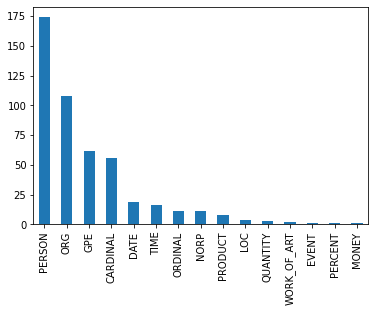

In [22]:
df['Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

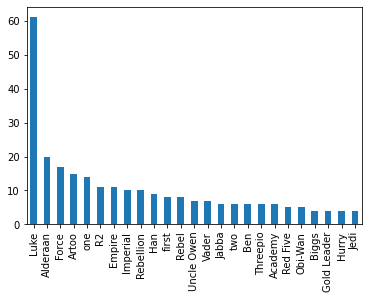

In [23]:
df['Entity'].value_counts()[:25].plot(kind='bar')